In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
train_label_15_path = "../data/labels/trainLabels15.csv"
test_label_15_path = "../data/labels/testLabels15.csv"
train_label_19_path = "../data/labels/trainLabels19.csv"
test_label_19_path = "../data/labels/testImages19.csv"
# train_images_15_path = ""
# test_images_15_path = ""
# train_images_19_path = ""
# test_images_19_path = ""

In [3]:
test_19_df = pd.read_csv(test_label_19_path)
print(test_19_df.columns)
test_19_df.head(5)

Index(['id_code'], dtype='object')


,id_code
0,0005cfc8afb6
1,003f0afdcd15
2,006efc72b638
3,00836aaacf06
4,009245722fa4


In [ ]:
train_19_df = pd.read_csv(train_label_19_path)
print(train_19_df.columns)
train_19_df.head(5)

In [5]:
test_15_df = pd.read_csv(test_label_15_path)
print(test_15_df.columns)
test_15_df.head(5)

Index(['image', 'level', 'Usage'], dtype='object')


,image,level,Usage
0,1_left,0,Private
1,1_right,0,Private
2,2_left,0,Public
3,2_right,0,Public
4,3_left,2,Private


In [6]:
test_15_df.shape

(53576, 3)

In [7]:
train_15_df = pd.read_csv(train_label_15_path)
print(train_15_df.columns)
train_15_df.head(5)

Index(['image', 'level'], dtype='object')


,image,level
0,10_left,0
1,10_right,0
2,13_left,0
3,13_right,0
4,15_left,1


In [8]:
train_15_df.shape

(35126, 2)

In [19]:
import matplotlib.pyplot as plt

In [28]:

def cust_format(x):
    print(x)
    return '{:.2f}'.format(x)

73.47833514213562
15.065763890743256
6.9549620151519775
2.4853384122252464
2.01560091227293


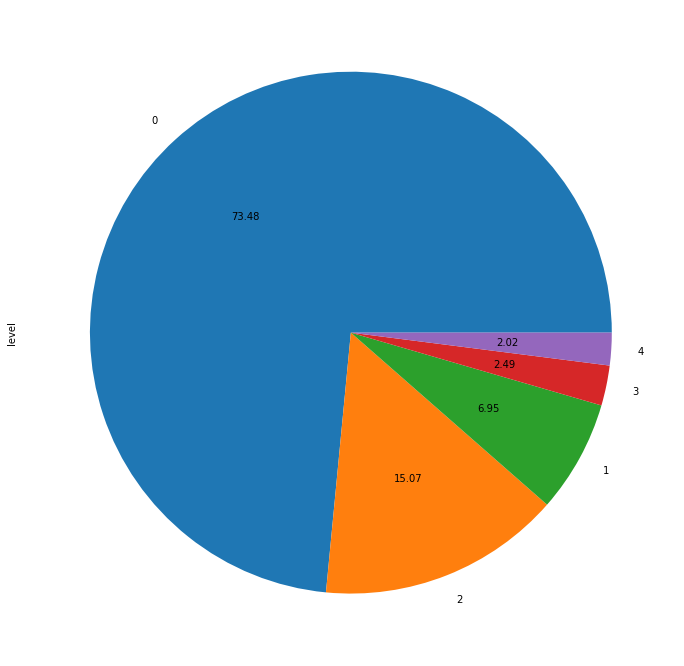

In [29]:
plt.figure(figsize=(18, 12));
train_15_df['level'].value_counts().plot(kind='pie', autopct = cust_format);

49.29000437259674
27.28017568588257
10.103768110275269
8.055707067251205
5.270344018936157


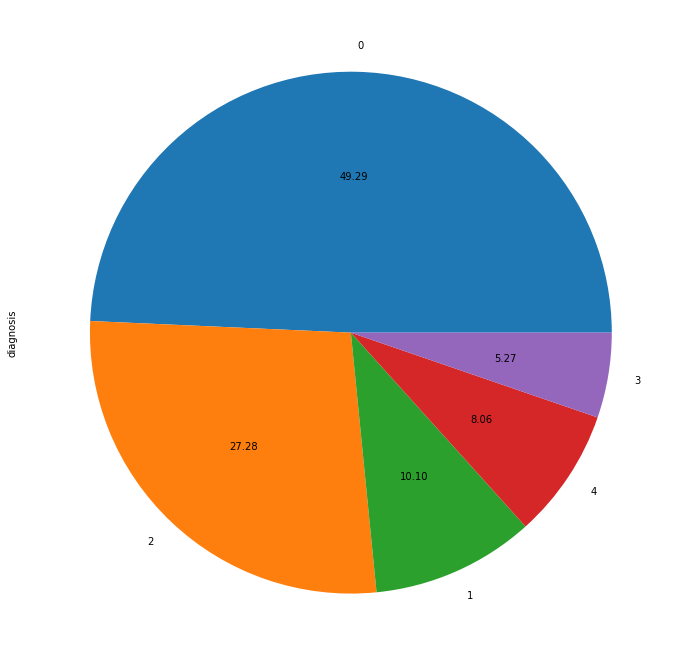

In [31]:
plt.figure(figsize=(18, 12));
train_19_df['diagnosis'].value_counts().plot(kind='pie',  autopct = cust_format);

In [7]:
sub_train_19_df, val_19_df = train_test_split(train_19_df, test_size=0.1, random_state=42, stratify=train_19_df.diagnosis)

In [8]:
# combine val_19_df and test_15_df into test_df 
# combine sub_train_19_df and train_15_df into train_df

In [11]:
sub_train_19_df.shape

(3295, 2)

In [12]:
val_19_df.shape

(367, 2)

In [13]:
train_15_df['path'] = train_15_df.image.apply(lambda p: f'/mnt/hdd/thuonglc/study/btl-aptos/data/resized train 15/{p}.jpg')
sub_train_19_df['path'] = sub_train_19_df.id_code.apply(lambda p: f'/mnt/hdd/thuonglc/study/btl-aptos/data/resized train 19/{p}.jpg')
val_19_df['path'] = val_19_df.id_code.apply(lambda p: f'/mnt/hdd/thuonglc/study/btl-aptos/data/resized train 19/{p}.jpg')
test_15_df['path'] = test_15_df.image.apply(lambda p: f'/mnt/hdd/thuonglc/study/btl-aptos/data/resized test 15/{p}.jpg')

In [14]:
train_img_path = []
train_img_diagnosis = []
train_img_ids = []

train_img_path.extend(train_15_df['path'].tolist())
train_img_path.extend(sub_train_19_df['path'].tolist())

train_img_diagnosis.extend(train_15_df['level'].tolist())
train_img_diagnosis.extend(sub_train_19_df['diagnosis'].tolist())

train_img_ids.extend(train_15_df['image'].tolist())
train_img_ids.extend(sub_train_19_df['id_code'].tolist())

In [15]:
val_img_path = []
val_img_diagnosis = []
val_img_ids = []

val_img_path.extend(test_15_df['path'].tolist())
val_img_path.extend(val_19_df['path'].tolist())

val_img_diagnosis.extend(test_15_df['level'].tolist())
val_img_diagnosis.extend(val_19_df['diagnosis'].tolist())

val_img_ids.extend(test_15_df['image'].tolist())
val_img_ids.extend(val_19_df['id_code'].tolist())

In [16]:
train_df = pd.DataFrame({'id_code':train_img_ids, 'diagnosis': train_img_diagnosis, 'path':train_img_path})
val_df = pd.DataFrame({'id_code':val_img_ids, 'diagnosis': val_img_diagnosis, 'path':val_img_path})

In [17]:
train_df.to_csv('../data/train.csv')
val_df.to_csv('../data/val.csv')